In [ ]:
# write about the decion tree define in easy words uses and   feature and procedure of working 


In [1]:
import pandas     as pd
import numpy      as np
import matplotlib.pyplot as plt
import seaborn    as sns


In [4]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data=df[["Survived","Pclass","Sex","Age","Fare"]]
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [18]:
input_data=data.drop("Survived",axis=1)
input_data.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [19]:
target=data["Survived"]
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [20]:
input_data["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [21]:
input_data.Age=input_data.Age.fillna(input_data.Age.mean())
input_data.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [22]:
input_data.Sex=input_data.Sex.map({"male":0,"female":1})
input_data.head()

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, target, test_size=0.3)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 4), (268, 4), (623,), (268,))

In [39]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
clf.predict(X_test)
clf.score(X_test, y_test)

0.7985074626865671

In [27]:
clf.predict([[3, 0, 22, 7.25]])  # Example input

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

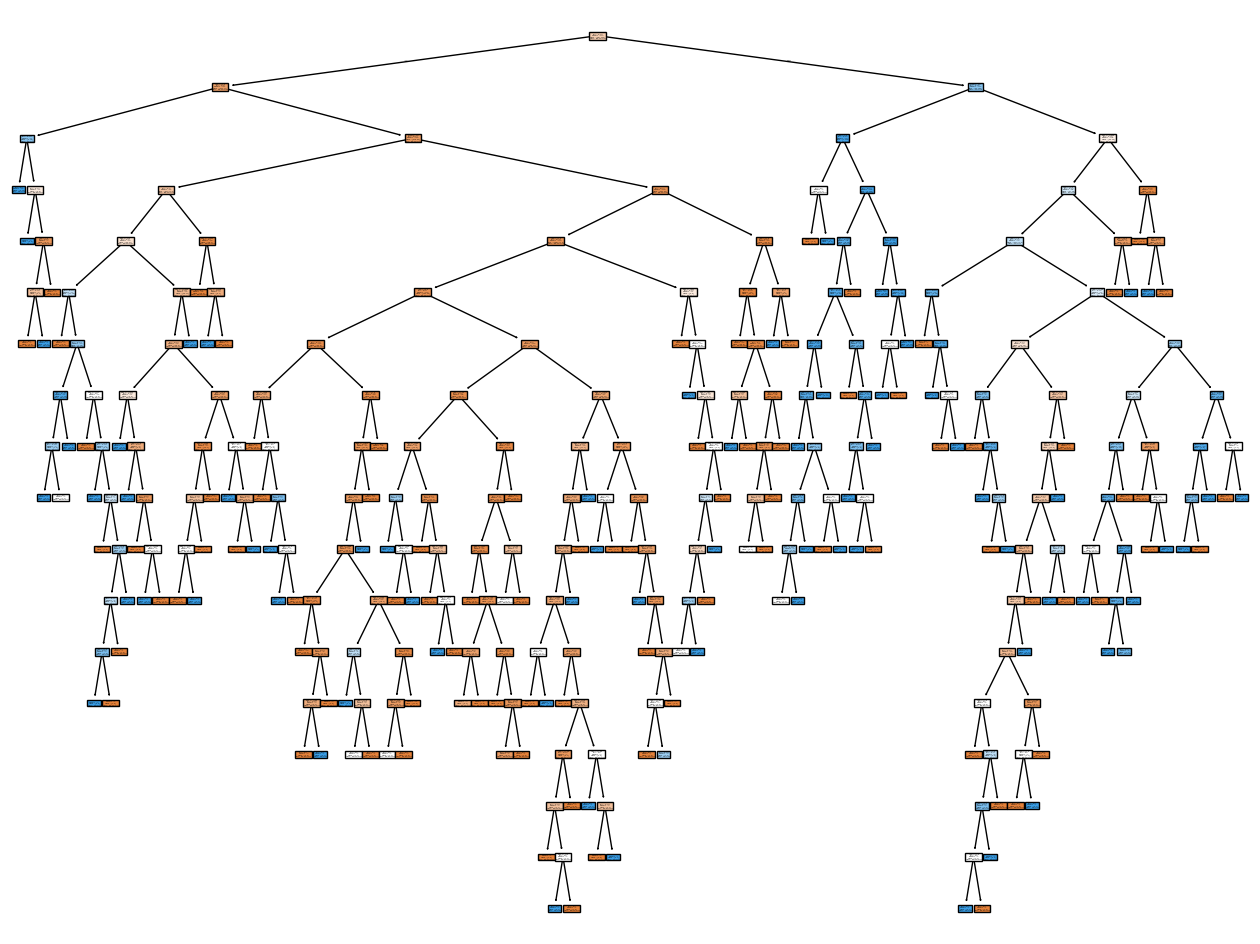

In [42]:
# visualize the decision tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
tree.plot_tree(clf, filled=True, feature_names=input_data.columns, class_names=["Not Survived", "Survived"])
plt.show()


In [43]:
# save this model
import joblib
joblib.dump(clf, "titanic_decision_tree_model.pkl")


['titanic_decision_tree_model.pkl']